# Analiza Danych - Projekt
Marcin Jeznach 241204 \
Semestr letni 2023/24

## Zbi√≥r danych

[Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data 'Zbi√≥r danych - UCI')

Zbi√≥r danych zawiera dane 1000 klient√≥w, bƒôdƒÖcych kredytobiorcami banku i klasyfikuje ich na dwie klasy (dobrych kredytobiorc√≥w i z≈Çych kredytobiorc√≥w, lub inaczej niskie i wysokie ryzyko). Celem projektu jest stworzenie modelu predykcji ryzyka kredytowego.

### Opis kolumn

Zar√≥wno w opisie zbiory danych, jak i samym zbiorze danych, kolumny nie majƒÖ opisowych nazw - opis wymienia jedynie nazwy `Attribute 1` - `Attribute 20`. Aby zwiƒôkszyƒá czytelno≈õƒá zar√≥wno kodu, jak i tabel/wykres√≥w, do danych przypisane zosta≈Çy w≈Çasne nazwy.

Warto≈õci kolumn kategorycznych zosta≈Çy zakodowane w danych ≈∫r√≥d≈Çowych jako `A{n}{m}`, gdzie `{n}` to numer kolumny, a `{m}` to numer kategorii. Aby ponownie zwiƒôkszyƒá czytelno≈õƒá, jako s≈Çowniki dla tych kategorii, u≈ºyte zostanƒÖ opisy warto≈õci, przet≈Çumaczone na jƒôzyk polski.

Warto r√≥wnie≈º zwr√≥ciƒá uwagƒô, ≈ºe zbi√≥r danych powsta≈Ç w 1994 roku, przez co warto≈õci walutowe podawane sƒÖ w Markach Niemieckich (DM).

Je≈ºeli nie podano inaczej, to warto≈õci czasowe sƒÖ najprawdopodobniej wyra≈ºone w latach.

| Nazwa kolumny (oryginalna) | Nazwa kolumny (w≈Çasna)    | Typ kolumny  | Opis kolumny                                                |
| -------------------------- | ------------------------- | ------------ | ----------------------------------------------------------- |
| Attribute 1                | Saldo ROR                 | kategoryczna | Bie≈ºƒÖce saldo u≈ºywanego rachunku rozliczeniowego            |
| Attribute 2                | Okres kredytowania        | numeryczna   | Czas trwania kredytu, w miesiƒÖcach                          |
| Attribute 3                | Historia kredytowa        | kategoryczna | Historia dotychczasowych kredyt√≥w i terminowosci            |
| Attribute 4                | Cel konsumpcyjny          | kategoryczna | Na co planowane jest przeznaczenie po≈ºyczonych ≈õrodk√≥w      |
| Attribute 5                | Kwota kredytu             | numeryczna   |                                                             |
| Attribute 6                | Saldo oszczƒôdno≈õci        | kategoryczna | Suma salda rachunk√≥w oszczƒôdno≈õciowych i warto≈õci obligacji |
| Attribute 7                | Bie≈ºƒÖcy sta≈º pracy        | kategoryczna | Czas pracy w bie≈ºƒÖcym miejscu zatrudnienia                  |
| Attribute 8                | Wska≈∫nik RdD              | numeryczna   | Stosunek wysoko≈õci raty miesiƒôcznej do dochod√≥w, w %        |
| Attribute 9                | Stan cywilny              | kategoryczna |                                                             |
| Attribute 10               | Dodatkowy d≈Çu≈ºnik         | kategoryczna | Czy do kredytu dopisane sƒÖ inne osoby / w jakim charakterze |
| Attribute 11               | Bie≈ºƒÖcy czas zamieszkania | numeryczna   | Czas zamieszkania pod obecnym adresem zamieszkania          |
| Attribute 12               | Mienie                    | kategoryczna | Inne mienie nie wymienione w saldzie oszczƒôdno≈õci           |
| Attribute 13               | Wiek                      | numeryczna   |                                                             |
| Attribute 14               | Pozosta≈Çe zobowiƒÖzania    | kategoryczna | Czy klient posiada inne zobowiƒÖzania ratalne                |
| Attribute 15               | Typ zamieszkania          | kategoryczna | Charakter w jakim klient zamieszkuje pod obecnym adresem    |
| Attribute 16               | Liczba zobowiƒÖza≈Ñ         | numeryczna   | Liczba pozosta≈Çych (niesp≈Çaconych?) zobowiƒÖza≈Ñ              |
| Attribute 17               | Rodzaj zawodu             | kategoryczna |                                                             |
| Attribute 18               | Osoby na utrzymaniu       | numeryczna   | Liczba os√≥b bƒôdƒÖcych na utrzymaniu klienta                  |
| Attribute 19               | Numer telefonu            | kategoryczna | Czy klient posiada / poda≈Ç(a) numer telefonu                |
| Attribute 20               | Pracownik zagraniczny     | kategoryczna | Czy klient jest pracownikiem zagranicznym                   |

Dodatkowo wystƒôpuje kolumna kategoryczna z ocenƒÖ ryzyka kredytowego.


#### Za≈Çadowanie danych

In [562]:
import typing as tp
import types as ts

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import (
	preprocessing,
	model_selection,
	ensemble,
	metrics,
)

# Za≈Çadowanie danych
data_df = pd.read_csv(
	'./german.data',
	sep=' ', 
	names= [
		'Saldo ROR',
		'Okres kredytowania',
		'Historia kredytowa',
		'Cel konsumpcyjny',
		'Kwota kredytu',
		'Saldo oszczƒôdno≈õci',
		'Bie≈ºƒÖcy sta≈º pracy',
		'Wska≈∫nik RdD',
		'Stan cywilny',
		'Dodatkowy d≈Çu≈ºnik',
		'Bie≈ºƒÖcy czas zamieszkania',
		'Mienie',
		'Wiek',
		'Pozosta≈Çe zobowiƒÖzania',
		'Typ zamieszkania',
		'Liczba zobowiƒÖza≈Ñ',
		'Rodzaj zawodu',
		'Osoby na utrzymaniu',
		'Numer telefonu',
		'Pracownik zagraniczny',
		'Ocena ryzyka',
	],
	index_col= False
)

# Stworzenie typu pomocniczego z listƒÖ nazw kolumn
column_t = tp.Literal[
	'Saldo ROR',
	'Okres kredytowania',
	'Historia kredytowa',
	'Cel konsumpcyjny',
	'Kwota kredytu',
	'Saldo oszczƒôdno≈õci',
	'Bie≈ºƒÖcy sta≈º pracy',
	'Wska≈∫nik RdD',
	'Stan cywilny',
	'Dodatkowy d≈Çu≈ºnik',
	'Bie≈ºƒÖcy czas zamieszkania',
	'Mienie',
	'Wiek',
	'Pozosta≈Çe zobowiƒÖzania',
	'Typ zamieszkania',
	'Liczba zobowiƒÖza≈Ñ',
	'Rodzaj zawodu',
	'Osoby na utrzymaniu',
	'Numer telefonu',
	'Pracownik zagraniczny',
	'Ocena ryzyka',
]

### S≈Çowniki kolumn kategorycznych

Poni≈ºej znajdujƒÖ siƒô mapowania znaczenia kolumn kategorycznych. Ewentualne obja≈õnienia znajdujƒÖ siƒô w komentarzu na ko≈Ñcu linii z danƒÖ warto≈õciƒÖ.

Je≈ºeli nie podano inaczej, to g√≥rna warto≈õƒá zakres√≥w jest warto≈õciƒÖ wy≈ÇƒÖcznƒÖ (warto≈õƒá `v` w zakresie `x` do `y` oznacza `x` <= `v` < `y`).

In [563]:

data_df['Saldo ROR'] = data_df['Saldo ROR'].map({
	'A11': 'Poni≈ºej 0 DM',
	'A12': '0 DM do 200 DM',
	'A13': 'Ponad 200 DM',
	'A14': 'Brak ROR',
})

data_df['Historia kredytowa'] = data_df['Historia kredytowa'].map({
	'A30': 'Nigdy nie brano lub Wszystkie sp≈Çacono w terminach',
	'A31': 'Wszystkie kredyty wewnƒôtrzne sp≈Çacono w terminie', # Przez kredyty wewnƒôtrzne danego banku, rozumie siƒô takie kt√≥rych dany bank jest kredytodawcƒÖ
	'A32': 'IstniejƒÖce kredyty dotychczasowo sp≈Çacono w terminie',
	'A33': 'W przesz≈Ço≈õci wystƒôpowa≈Çy op√≥≈∫nienia w sp≈Çacie',
	'A34': 'Krytyczny rachunek lub istniejƒÖce kredyty zewnƒôtrzne',
})

data_df['Cel konsumpcyjny'] = data_df['Cel konsumpcyjny'].map({
	'A40': 'Samoch√≥d nowy',
	'A41': 'Samoch√≥d u≈ºywany',
	'A42': 'Meble i wyposa≈ºenie',
	'A43': 'RTV',
	'A44': 'AGD',
	'A45': 'Naprawy',
	'A46': 'Edukacja',
	'A47': 'Wakacje',
	'A48': 'Szkolenia', # Warto≈õƒá oryginalna 'retraining', mo≈ºe r√≥wnie≈º oznaczaƒá przekwalifikowanie
	'A49': 'Wydatki biznesowe',
	'A410': 'Inne',
})

data_df['Saldo oszczƒôdno≈õci'] = data_df['Saldo oszczƒôdno≈õci'].map({
	'A61': 'Poni≈ºej 100 DM',
	'A62': '100 DM do 500 DM',
	'A63': '500 DM do 1000 DM',
	'A64': 'Powy≈ºej 1000 DM',
	'A65': 'Brak lub nieznana warto≈õƒá',
})

data_df['Bie≈ºƒÖcy sta≈º pracy'] = data_df['Bie≈ºƒÖcy sta≈º pracy'].map({
	'A71': 'Bezrobotny/a',
	'A72': 'Do 1 roku',
	'A73': '1 do 4 lat',
	'A74': '4 do 7 lat',
	'A75': 'Powy≈ºej 7 lat',
})

data_df['Stan cywilny'] = data_df['Stan cywilny'].map({
	'A91': 'Rozwodnik lub w separacji',
	'A92': 'Rozw√≥dka, w separacji lub zamƒô≈ºna',
	'A94': 'Kawaler',
	'A93': '≈ªonaty lub wdowiec',
	'A95': 'Panna',
})

data_df['Dodatkowy d≈Çu≈ºnik'] = data_df['Dodatkowy d≈Çu≈ºnik'].map({
	'A101': 'Brak',
	'A102': 'Wsp√≥≈Çkredytobiorca',
	'A103': 'Porƒôczyciel',
})

data_df['Mienie'] = data_df['Mienie'].map({
	'A121': 'Nieruchomo≈õci',
	'A122': 'Oszczƒôdno≈õci w Towarzystwie Budowlanym lub Ubezpieczenie na ≈ºycie',
	'A123': 'Samoch√≥d lub inne (nie dotyczy oszczƒôdno≈õci)',
	'A124': 'Nieznane lub brak majƒÖtku nieruchomego',
})

data_df['Pozosta≈Çe zobowiƒÖzania'] = data_df['Pozosta≈Çe zobowiƒÖzania'].map({
	'A141': 'Kredyty bankowe',
	'A142': 'Zakupy na raty',
	'A143': 'Brak',
})

data_df['Typ zamieszkania'] = data_df['Typ zamieszkania'].map({
	'A151': 'Wynajem',
	'A152': 'Nieruchomo≈õƒá na w≈Çasno≈õƒá',
	'A153': 'Mieszkanie socjalne', # Warto≈õƒá oryginalna to 'for free', ciƒô≈ºko znale≈∫ƒá inne sensowne t≈Çumaczenie
})

data_df['Rodzaj zawodu'] = data_df['Rodzaj zawodu'].map({
	'A171': 'Bezrobotny lub niewykwalifikowany/a - brak obywatelstwa',
	'A172': 'Niewykwalifikowany/a - obywatel(ka)',
	'A173': 'Wykwalifikowany/a lub Urzƒôdnik/czka',
	'A174': 'Kadra mened≈ºerska, Samozatrudnienie, Wysokie kwalifikacje lub Funkcjonariusz(ka)',
})

data_df['Numer telefonu'] = data_df['Numer telefonu'].map({
	'A191': 'Brak numeru telefonu',
	'A192': 'Numer telefonu zarejestrowany na danego klienta',
})

data_df['Pracownik zagraniczny'] = data_df['Pracownik zagraniczny'].map({
	'A201': 'Tak',
	'A202': 'Nie',
})

data_df['Ocena ryzyka'] = data_df['Ocena ryzyka'].map({
	1: 'Niskie ryzyko / dobry klient',
	2: 'Wysokie ryzyko / z≈Çy klient',
})

data_df.head()

Saldo ROR  Okres kredytowania  \
0    Poni≈ºej 0 DM                   6   
1  0 DM do 200 DM                  48   
2        Brak ROR                  12   
3    Poni≈ºej 0 DM                  42   
4    Poni≈ºej 0 DM                  24   

                                  Historia kredytowa     Cel konsumpcyjny  \
0  Krytyczny rachunek lub istniejƒÖce kredyty zewn...                  RTV   
1  IstniejƒÖce kredyty dotychczasowo sp≈Çacono w te...                  RTV   
2  Krytyczny rachunek lub istniejƒÖce kredyty zewn...             Edukacja   
3  IstniejƒÖce kredyty dotychczasowo sp≈Çacono w te...  Meble i wyposa≈ºenie   
4     W przesz≈Ço≈õci wystƒôpowa≈Çy op√≥≈∫nienia w sp≈Çacie        Samoch√≥d nowy   

   Kwota kredytu         Saldo oszczƒôdno≈õci Bie≈ºƒÖcy sta≈º pracy  Wska≈∫nik RdD  \
0           1169  Brak lub nieznana warto≈õƒá      Powy≈ºej 7 lat             4   
1           5951             Poni≈ºej 100 DM         1 do 4 lat             2   
2           2096             Poni≈ºej 100 DM         4 do 7 lat             2   
3           7882             Poni≈ºej 100 DM         4 do 7 lat             2   
4           4870             Poni≈ºej 100 DM         1 do 4 lat             3   

                        Stan cywilny Dodatkowy d≈Çu≈ºnik  ...  \
0                 ≈ªonaty lub wdowiec              Brak  ...   
1  Rozw√≥dka, w separacji lub zamƒô≈ºna              Brak  ...   
2                 ≈ªonaty lub wdowiec              Brak  ...   
3                 ≈ªonaty lub wdowiec       Porƒôczyciel  ...   
4                 ≈ªonaty lub wdowiec              Brak  ...   

                                              Mienie Wiek  \
0                                      Nieruchomo≈õci   67   
1                                      Nieruchomo≈õci   22   
2                                      Nieruchomo≈õci   49   
3  Oszczƒôdno≈õci w Towarzystwie Budowlanym lub Ube...   45   
4             Nieznane lub brak majƒÖtku nieruchomego   53   

   Pozosta≈Çe zobowiƒÖzania          Typ zamieszkania Liczba zobowiƒÖza≈Ñ  \
0                    Brak  Nieruchomo≈õƒá na w≈Çasno≈õƒá                 2   
1                    Brak  Nieruchomo≈õƒá na w≈Çasno≈õƒá                 1   
2                    Brak  Nieruchomo≈õƒá na w≈Çasno≈õƒá                 1   
3                    Brak       Mieszkanie socjalne                 1   
4                    Brak       Mieszkanie socjalne                 2   

                         Rodzaj zawodu Osoby na utrzymaniu  \
0  Wykwalifikowany/a lub Urzƒôdnik/czka                   1   
1  Wykwalifikowany/a lub Urzƒôdnik/czka                   1   
2  Niewykwalifikowany/a - obywatel(ka)                   2   
3  Wykwalifikowany/a lub Urzƒôdnik/czka                   2   
4  Wykwalifikowany/a lub Urzƒôdnik/czka                   2   

                                    Numer telefonu Pracownik zagraniczny  \
0  Numer telefonu zarejestrowany na danego klienta                   Tak   
1                             Brak numeru telefonu                   Tak   
2                             Brak numeru telefonu                   Tak   
3                             Brak numeru telefonu                   Tak   
4                             Brak numeru telefonu                   Tak   

                   Ocena ryzyka  
0  Niskie ryzyko / dobry klient  
1   Wysokie ryzyko / z≈Çy klient  
2  Niskie ryzyko / dobry klient  
3  Niskie ryzyko / dobry klient  
4   Wysokie ryzyko / z≈Çy klient  

[5 rows x 21 columns]

Dane nie posiadajƒÖ warto≈õci brakujƒÖcych, ani identyfikator√≥w - dalsze przekszta≈Çcenia nie sƒÖ konieczne.

## Analiza danych

### Statystyki warto≈õci numerycznych

In [564]:
data_df.select_dtypes('int').describe()

Okres kredytowania  Kwota kredytu  Wska≈∫nik RdD  \
count         1000.000000    1000.000000   1000.000000   
mean            20.903000    3271.258000      2.973000   
std             12.058814    2822.736876      1.118715   
min              4.000000     250.000000      1.000000   
25%             12.000000    1365.500000      2.000000   
50%             18.000000    2319.500000      3.000000   
75%             24.000000    3972.250000      4.000000   
max             72.000000   18424.000000      4.000000   

       Bie≈ºƒÖcy czas zamieszkania         Wiek  Liczba zobowiƒÖza≈Ñ  \
count                1000.000000  1000.000000        1000.000000   
mean                    2.845000    35.546000           1.407000   
std                     1.103718    11.375469           0.577654   
min                     1.000000    19.000000           1.000000   
25%                     2.000000    27.000000           1.000000   
50%                     3.000000    33.000000           1.000000   
75%                     4.000000    42.000000           2.000000   
max                     4.000000    75.000000           4.000000   

       Osoby na utrzymaniu  
count          1000.000000  
mean              1.155000  
std               0.362086  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               2.000000

#### Klienci z niskim ryzykiem

In [565]:
data_df[data_df['Ocena ryzyka'] == 'Niskie ryzyko / dobry klient'].select_dtypes('int').describe()

Okres kredytowania  Kwota kredytu  Wska≈∫nik RdD  \
count          700.000000     700.000000    700.000000   
mean            19.207143    2985.457143      2.920000   
std             11.079564    2401.472278      1.128078   
min              4.000000     250.000000      1.000000   
25%             12.000000    1375.500000      2.000000   
50%             18.000000    2244.000000      3.000000   
75%             24.000000    3634.750000      4.000000   
max             60.000000   15857.000000      4.000000   

       Bie≈ºƒÖcy czas zamieszkania        Wiek  Liczba zobowiƒÖza≈Ñ  \
count                 700.000000  700.000000         700.000000   
mean                    2.842857   36.224286           1.424286   
std                     1.108373   11.381145           0.584721   
min                     1.000000   19.000000           1.000000   
25%                     2.000000   27.000000           1.000000   
50%                     3.000000   34.000000           1.000000   
75%                     4.000000   42.250000           2.000000   
max                     4.000000   75.000000           4.000000   

       Osoby na utrzymaniu  
count           700.000000  
mean              1.155714  
std               0.362844  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               2.000000

#### Klienci z wysokim ryzykiem

In [566]:
data_df[data_df['Ocena ryzyka'] == 'Wysokie ryzyko / z≈Çy klient'].select_dtypes('int').describe()

Okres kredytowania  Kwota kredytu  Wska≈∫nik RdD  \
count          300.000000     300.000000    300.000000   
mean            24.860000    3938.126667      3.096667   
std             13.282639    3535.818955      1.088395   
min              6.000000     433.000000      1.000000   
25%             12.000000    1352.500000      2.000000   
50%             24.000000    2574.500000      4.000000   
75%             36.000000    5141.500000      4.000000   
max             72.000000   18424.000000      4.000000   

       Bie≈ºƒÖcy czas zamieszkania        Wiek  Liczba zobowiƒÖza≈Ñ  \
count                 300.000000  300.000000         300.000000   
mean                    2.850000   33.963333           1.366667   
std                     1.094605   11.222379           0.559702   
min                     1.000000   19.000000           1.000000   
25%                     2.000000   25.000000           1.000000   
50%                     3.000000   31.000000           1.000000   
75%                     4.000000   40.000000           2.000000   
max                     4.000000   74.000000           4.000000   

       Osoby na utrzymaniu  
count           300.000000  
mean              1.153333  
std               0.360911  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               2.000000

Rozk≈Çad ocen ryzyka klient√≥w wynosi 700-300 (niskie-wysokie), co mo≈ºe potencjalnie wymagaƒá balansowania.

Na pierwszy rzut oka, z wyjƒÖtkiem okresu kredytowania oraz kwoty kredytu, reszta kolumn numerycznych ma zbli≈ºone warto≈õci ≈õrednie.

### Balansowanie danych

Aby zbalansowaƒá zbiory danych wg kategorii, dokonamy duplikacji rekord√≥w (niskie¬†ryzyko¬†‚®â¬†2, wysokie¬†ryzyko¬†‚®â¬†5), co sprawi ≈ºe stosunek klasy niskiego ryzyka do wysokiego znacznie siƒô wyr√≥wna z `1 : 0.429` do `1 : 1.07`.

In [567]:
data_df_good = data_df[data_df['Ocena ryzyka'] == 'Niskie ryzyko / dobry klient']
data_df_bad = data_df[data_df['Ocena ryzyka'] == 'Wysokie ryzyko / z≈Çy klient']

data_df_good_os = pd.concat([data_df_good] * 2, ignore_index= True)
data_df_bad_os = pd.concat([data_df_bad] * 5, ignore_index= True)

data_df = pd.concat([data_df_good_os, data_df_bad_os], ignore_index= True)

Nie bƒôdziemy wykonywaƒá dodatkowego mieszania obserwacji na tym etapie - dane do modelu bƒôdƒÖ rozdzielane z u≈ºyciem algorytmu kt√≥ry ju≈º bƒôdzie wprowadzaƒá element losowania obserwacji.

### Tabele krzy≈ºowe warto≈õci kategorycznych

In [568]:
def get_crosstab(col: column_t):
	"""
	Zwraca tabelƒô krzy≈ºowƒÖ dla podanej kolumny ``col``, wzglƒôdem oceny ryzyka.
	"""
	return pd.crosstab(
		data_df['Ocena ryzyka'],
		data_df[col],
		normalize='index'
	).style.background_gradient(
		axis= None,
		cmap= 'pink',
	)
get_crosstab('Saldo ROR')

In [569]:
get_crosstab('Historia kredytowa')

In [570]:
get_crosstab('Cel konsumpcyjny')

In [571]:
get_crosstab('Saldo oszczƒôdno≈õci')

In [572]:
get_crosstab('Bie≈ºƒÖcy sta≈º pracy')

In [573]:
get_crosstab('Stan cywilny')

In [574]:
get_crosstab('Dodatkowy d≈Çu≈ºnik')

In [575]:
get_crosstab('Mienie')

In [576]:
get_crosstab('Pozosta≈Çe zobowiƒÖzania')

In [577]:
get_crosstab('Typ zamieszkania')

In [578]:
get_crosstab('Rodzaj zawodu')

In [579]:
get_crosstab('Numer telefonu')

In [580]:
get_crosstab('Pracownik zagraniczny')

*Powy≈ºsze tabele krzy≈ºowe zosta≈Çy znormalizowane na poziomie wierszy, dajƒÖc liczno≈õci wyra≈ºone w procentach.*

Tabele krzy≈ºowe dla stanu cywilnego, wystƒôpowania dodatkowego d≈Çu≈ºnika, oraz czy osoba jest pracownikiem zagranicznym, wskazujƒÖ niezbyt r√≥≈ºnice w liczno≈õciach danych grup - mo≈ºe to oznaczaƒá ma≈Çe powiƒÖzanie tych zmiennych.

W przypadku faktu posiadania numeru telefonu, r√≥≈ºnice liczno≈õci sƒÖ ju≈º ma≈Çe, a w przypadku rodzaju wykonywanego zawodu - w wiƒôkszo≈õci grup znikome; mo≈ºna wstƒôpnie za≈Ço≈ºyƒá brak powiƒÖzania zmiennych do oceny ryzyka.

## Wyb√≥r zmiennych modelowych

### Test Chi-kwadrat

In [581]:
chi_table = pd.DataFrame(columns= ['Kolumna', 'Typ', 'Chi^2', 'P-val[%]'])

col: column_t
for col in data_df.columns:
	if col == 'Ocena ryzyka': continue
	contingency = pd.crosstab(data_df[col], data_df['Ocena ryzyka'])
	chi_2, p, _, _ = stats.chi2_contingency(contingency)
	typ = 'num' if data_df[col].dtype == 'int64' else 'kat'
	chi_table.loc[
		len(chi_table),
		['Kolumna', 'Typ', 'Chi^2', 'P-val[%]']
	] = (col, typ, chi_2, p)

chi_table['P-val[%]'] *= 100

chi_table.style.background_gradient(
	axis= None,
	cmap= 'summer',
	subset= 'P-val[%]',
).format({
	'P-val[%]': '{:.2f}'
})

Zgodnie z testem widaƒá, ≈ºe z wyjƒÖtkiem `Bie≈ºƒÖcy czas zamieszkania`, `Osoby na utrzymaniu`,
oraz w mniejszym stopniu `Rodzaj zawodu`, wiƒôkszo≈õƒá zmiennych jest powiƒÖzana z finalnym wynikiem ryzyka.

Do treningu modelu wybierzemy zmienne posiadajƒÖce warto≈õƒá `'P-val'` < 4, a je≈ºeli wyniki treningu bƒôdƒÖ niezadowalajƒÖce, ograniczymy siƒô do zmiennych z warto≈õciƒÖ  `'P-val'` < 0.1.

### Wyb√≥r zmiennych do tworzenia modeli

In [582]:
model_cols_df = chi_table[chi_table['P-val[%]'] < 4.0]
model_cols_df = model_cols_df[['Kolumna', 'Typ']]
model_cols_df = pd.concat([
	model_cols_df,
	pd.DataFrame({'Kolumna': 'Ocena ryzyka', 'Typ': 'kat'}, index= [0]),
], ignore_index=True)
model_cols_df

Kolumna  Typ
0                Saldo ROR  kat
1       Okres kredytowania  num
2       Historia kredytowa  kat
3         Cel konsumpcyjny  kat
4            Kwota kredytu  num
5       Saldo oszczƒôdno≈õci  kat
6       Bie≈ºƒÖcy sta≈º pracy  kat
7             Wska≈∫nik RdD  num
8             Stan cywilny  kat
9        Dodatkowy d≈Çu≈ºnik  kat
10                  Mienie  kat
11                    Wiek  num
12  Pozosta≈Çe zobowiƒÖzania  kat
13        Typ zamieszkania  kat
14       Liczba zobowiƒÖza≈Ñ  num
15          Numer telefonu  kat
16   Pracownik zagraniczny  kat
17            Ocena ryzyka  kat

### Przygotowanie danych do treningu

Pomimo ≈ºe mamy dostarczone dwie wersje danych - z kodowanymi warto≈õciami kategorycznymi (`A{n}{m}`), oraz drugƒÖ z numerycznymi warto≈õciami kategorii, to do tworzenia modeli zastosujemy `LabelEncoder` z pakietu `sklearn.preprocessing`; dodatkowo stworzymy klasƒô pomocniczƒÖ kt√≥ra pozwoli nam p√≥≈∫niej na ≈Çatwe dekodowanie danych.

In [583]:
selected_data = data_df[model_cols_df['Kolumna']].copy()

class LabelDecoder(object):
	"""
	Klasa do dekodowania zarejestrowanych kolumn w ramkach danych.
	"""
	def __init__(self):
		self.encoders: dict[str, preprocessing.LabelEncoder] = {}
	
	@tp.overload
	def decode_columns(self, data: pd.Series, col_name: str | None = None) -> pd.Series:
		pass
	
	@tp.overload
	def decode_columns(self, data: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
		pass

	def decode_columns(self,
		data: pd.DataFrame | pd.Series,
		col: list[str] | str | None = None
	):
		"""
		Odkodowuje wszystkie kolumny wymienione w ``cols`` w ramce ``df``.
		Zwraca nowƒÖ ramkƒô.
		"""
		assert isinstance(data, (pd.DataFrame, pd.Series))
		if isinstance(data, pd.DataFrame):
			result = data.copy()
			assert isinstance(col, list)
			for name in col:
				if name not in self.encoders:
					raise ValueError(f'No encoder found for column: {name}')
				result[name] = self.encoders[name].inverse_transform(result[name])
			return result
		else:
			assert isinstance(col, (str, ts.NoneType))
			name = col if col is not None else data.name
			return pd.Series(self.encoders[name].inverse_transform(data), name= name)


ld = LabelDecoder()
for _, row in model_cols_df.iterrows():
	col: column_t = row['Kolumna']
	if row['Typ'] == 'kat':
		le = preprocessing.LabelEncoder()
		le.fit(selected_data[col])
		selected_data[col] = le.transform(selected_data[col])
		ld.encoders[col] = le

Rozdzielamy wczytanƒÖ tabelƒô na tabelƒô zmiennych wej≈õciowych oraz seriƒô warto≈õci wyj≈õciowych oceny ryzyka.

Dodatkowo rozdzielamy zestaw danych na dane treningowe oraz dane testowe, starajƒÖc siƒô zachowaƒá r√≥wnomierne proporcje ocen ryzyka w obydwu zbiorach.

W poni≈ºej zastosowanym algorytmie kt√≥ry wykorzystuje element losowo≈õci, jak i w kolejnych algorytmach kt√≥re dajƒÖ losowe wyniki w kolejnych wywo≈Çaniach, przekazujemy parametr `random_state=` (z odpowiedziƒÖ na wszystkie pytania wszech≈õwiata üòâ), aby m√≥c za ka≈ºdym razem odwo≈Çaƒá siƒô do tych samych wynik√≥w.

In [584]:
# Typ pomocniczy dla danych modelowych
model_data_t = tp.TypedDict('model_data_t', {
	'in': pd.DataFrame,
	'out_df': pd.DataFrame,
	'out': pd.Series,
})

# Podzia≈Ç danych modelowych na wej≈õciowe i wyj≈õciowe
model_data: model_data_t = {
	'in': selected_data.drop('Ocena ryzyka', axis=1),
	'out_df': selected_data['Ocena ryzyka'].to_frame(),
	'out': selected_data['Ocena ryzyka'],
}

# Podzia≈Ç danych na treningowe i testowe
train_model = model_data_t()
test_model = model_data_t()
model_split = model_selection.StratifiedShuffleSplit(
	n_splits= 1,
	test_size= 0.3,
	random_state= 42,
)
train_idx, test_idx =  next(model_split.split(
	model_data['in'],
	model_data['out'],
))
train_model['in'] = pd.DataFrame(model_data['in'].iloc[train_idx])
test_model['in'] = pd.DataFrame(model_data['in'].iloc[test_idx])
train_model['out_df'] = pd.DataFrame(model_data['out_df'].iloc[train_idx])
test_model['out_df'] = pd.DataFrame(model_data['out_df'].iloc[test_idx])

train_model['out'] = train_model['out_df']['Ocena ryzyka']
test_model['out'] = test_model['out_df']['Ocena ryzyka']


Dane treningowe:

In [585]:
(
	ld.decode_columns(train_model['out_df'], ['Ocena ryzyka'])
		.groupby('Ocena ryzyka')
		.size()
		.reset_index(name= 'Liczba wpis√≥w')
)

Ocena ryzyka  Liczba wpis√≥w
0  Niskie ryzyko / dobry klient            980
1   Wysokie ryzyko / z≈Çy klient           1050

Dane testowe:

In [586]:
(
	ld.decode_columns(test_model['out_df'], ['Ocena ryzyka'])
	.groupby('Ocena ryzyka')
		.size()
		.reset_index(name= 'Liczba wpis√≥w')
)

Ocena ryzyka  Liczba wpis√≥w
0  Niskie ryzyko / dobry klient            420
1   Wysokie ryzyko / z≈Çy klient            450

### Przygotowanie funkcji do ewaluacji modeli

Przygotujemy najpierw kilka funkcji do raportowania przyuczonych modeli.

Ze wzglƒôdu na znajomo≈õƒá danych pakiet√≥w, w funkcjach opr√≥cz zastosowania modu≈Ç√≥w *sklearn* ograniczam siƒô do u≈ºycia *Pandas* oraz *Matplotlib* (*pyplot*).

Funkcja do raport√≥w klasyfikacji:

In [587]:
def report(
	expected: pd.Series,
	predicted: np.ndarray,
	decoder: LabelDecoder | None = None,
):
	"""
	Funkcja tworzy raport klasyfikacji dla modelu, zwracajƒÖc go w formie ramki danych
	z zaznaczonymi kolorem wierszami reprezentujƒÖcymi przewidywane klasy.

	Mo≈ºna dodatkowo podaƒá dekoder dla przewidywanych klas.
	"""
	if decoder is not None:
		name = expected.name
		expected = decoder.decode_columns(expected)
		predicted = decoder.decode_columns(pd.Series(predicted, name= name))

	report = metrics.classification_report(
		expected,
		predicted,
		output_dict= True,
	)
	report = pd.DataFrame(report).transpose()

	def highlight_report_classes(row: pd.Series, row_positions: dict[str, int]):
		if row.name in expected.unique():
			if row_positions[row.name] % 2 == 0:
				return ['background-color: #e5e5ff'] * len(row)
			else:
				return ['background-color: #d5d5ee'] * len(row)
		return [''] * len(row)

	row_positions = {label: idx for idx, label in enumerate(report.index)}
	styled_report = report.style.apply(
		highlight_report_classes,
		axis= 1,
		row_positions= row_positions
	)
	return styled_report

Funkcja do rysowania krzywych ROC:

In [588]:
def roc(expected: pd.Series, predicted: np.ndarray):
	"""
	Funkcja rysuje krzywƒÖ ROC dla modelu, podajƒÖc powierzchniƒô pod krzywƒÖ.
	"""
	lb = preprocessing.LabelBinarizer()
	lb.fit(expected)
	exp_bin = lb.transform(expected)
	pred_bin = lb.transform(predicted)

	fpr, tpr, _ = metrics.roc_curve(exp_bin, pred_bin, pos_label= 1)
	roc_auc = metrics.auc(fpr, tpr)

	plt.plot(fpr, tpr, color= 'blue', lw= 2, label= f'Krzywa ROC (powierzchnia = {roc_auc:.2f})')
	plt.plot([0, 1], [0, 1], color= 'gray', linestyle= '--')
	plt.title('Charakterystyki Operacyjne Odbiornika')
	plt.xlabel('Wska≈∫nik warto≈õci Fa≈Çszywie Pozytywnych')
	plt.ylabel('Wska≈∫nik warto≈õci Prawdziwie Pozytywnych')
	plt.legend(loc= 'lower right')
	plt.show()

Funkcja do rysowania macierzy pomy≈Çek:

In [589]:
def con_mat(
	expected: pd.Series,
	predicted: np.ndarray,
	decoder: LabelDecoder | None = None
):
	"""
	Funkcja rysuje macierz pomy≈Çek dla modelu.

	Mo≈ºna dodatkowo podaƒá dekoder dla przewidywanych klas. Etykiety zdekodowanych klas
	sƒÖ obcinane do max 2 wyraz√≥w oraz max 20 znak√≥w.
	"""
	ticks = [0, 1]
	if decoder is not None:
		name = expected.name
		expected = decoder.decode_columns(expected)
		predicted = decoder.decode_columns(pd.Series(predicted, name= name))
		ticks = list(decoder.encoders[name].inverse_transform(np.array(ticks)))
		if isinstance(ticks[0], str):
			ticks = [' '.join(v.split()[:2])[:20] for v in ticks]

	mat = metrics.confusion_matrix(expected, predicted)
	v_cut = mat.max() / 2
	plt.matshow(mat, cmap= 'Purples')
	plt.colorbar()
	plt.title('Macierz pomy≈Çek')
	plt.xlabel('Przewidziane')
	plt.ylabel('Oczekiwane')
	for (i, j), val in np.ndenumerate(mat):
		c = '#ffffff' if val > v_cut else '#000000'
		plt.text(j, i, val, ha= 'center', va= 'center', color= c)
	plt.xticks([0, 1], ticks)
	plt.yticks([0, 1], ticks, rotation= 'vertical', va= 'center')
	plt.show()

## Modelowanie *Ryzyka kredytowego*

### Model *Lasu Drzew Losowych*

In [590]:
# Trening
rfc_model = ensemble.RandomForestClassifier(random_state= 42)
rfc_model.fit(train_model['in'], train_model['out'])

# Przewidywania z modelu
rfc_out = rfc_model.predict(test_model['in'])

report(test_model['out'], rfc_out, ld)

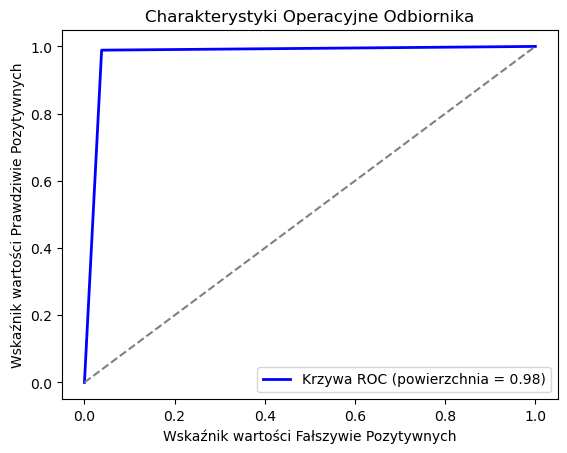

In [591]:
roc(test_model['out'], rfc_out)

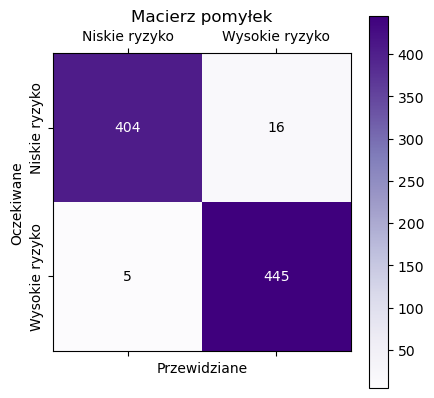

In [592]:
con_mat(test_model['out'], rfc_out, ld)